# How To Determine a Time-series Number of Decades?

In Eke's 2000 paper, he makes it abundantly clear that a timeseries needs to have a frequency range of two decades. But... how do we determine this?

From wikipedia: One decade is a unit for measuring frequency ratios on a logarithmic scale, with one decade corresponding to a ratio of 10 between two frequencies (an order of magnitude difference).

Ok, so let's play with a timeseries and see if we can determine the frequency range

In [107]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.signal import find_peaks
import scipy.fftpack



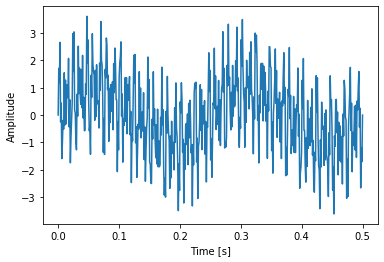

In [255]:
t = np.linspace(0, 0.5, 500)
s = np.sin(4 * 2 * np.pi * t) + np.sin(90 * 2 * np.pi * t) + np.sin(130 * 2 * np.pi * t) + np.sin(430 * 2 * np.pi * t)
plt.ylabel("Amplitude")
plt.xlabel("Time [s]")
plt.plot(t, s)
plt.show()

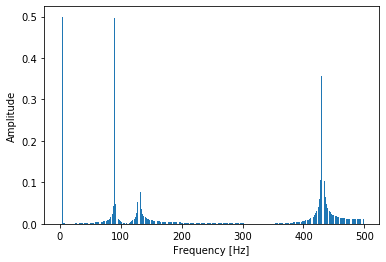

In [256]:
fft = np.fft.fft(s)
T = t[1] - t[0]  # sampling interval 
N = s.size

# 1/T = frequency
f = np.linspace(0, 1 / T, N)

plt.ylabel("Amplitude")
plt.xlabel("Frequency [Hz]")
plt.bar(f[:N // 2], np.abs(fft)[:N // 2] * 1 / N, width=1.5)  # 1 / N is a normalization factor
plt.show()

In [257]:
peaks, _ = find_peaks(np.abs(fft)[:N // 2] * 1 / N)
q = f[:N // 2]
print(q[peaks])

[  4.  90. 130. 430.]


In [258]:
min(q[peaks])

4.000000000000001

In [259]:
max(q[peaks])

430.0000000000001

In [260]:
decade = math.log(max(q[peaks])/min(q[peaks]),10)
print(decade)

2.0314084642516237


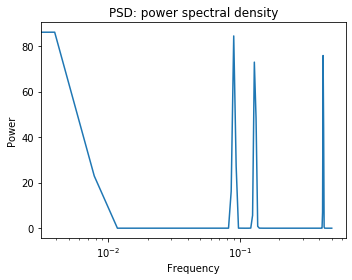

In [322]:
freqs, psd = signal.welch(s)

plt.figure(figsize=(5, 4))
plt.semilogx(freqs, psd)
plt.title('PSD: power spectral density')
plt.xlabel('Frequency')
plt.ylabel('Power')
plt.tight_layout()


In [335]:
def decade(signal,TR):
    timepoints = int(len(signal))
    fft = np.fft.fft(signal)
    peaks, _ = find_peaks(np.abs(fft)[:timepoints // 2] * 1 / timepoints)
    f = np.linspace(0, 1 / TR, timepoints)
    q = f[:timepoints // 2]
    decad = math.log(max(q[peaks])/min(q[peaks]),10)
    print(q[peaks])
    print(decad)

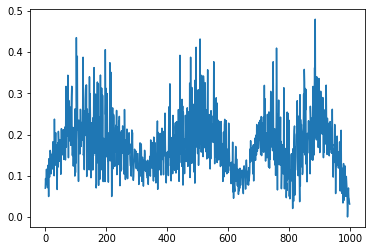

In [214]:
n = 1000
limit_low = 0
limit_high = 0.48
my_data = np.random.normal(0, 0.5, n) \
          + np.abs(np.random.normal(0, 2, n) \
                   * np.sin(np.linspace(0, 3*np.pi, n)) ) \
          + np.sin(np.linspace(0, 5*np.pi, n))**2 \
          + np.sin(np.linspace(1, 6*np.pi, n))**2

scaling = (limit_high - limit_low) / (max(my_data) - min(my_data))
my_data = my_data * scaling
my_data = my_data + (limit_low - min(my_data))

plt.plot(my_data)
plt.show()

In [281]:
decade(my_data)

[  6.  12.  16.  24.  30.  36.  42.  46.  54.  66.  70.  74.  80.  90.
  96. 102. 106. 110. 116. 120. 128. 134. 138. 142. 146. 152. 158. 162.
 166. 172. 176. 186. 190. 194. 200. 206. 212. 216. 224. 228. 236. 240.
 248. 260. 264. 268. 274. 286. 290. 298. 304. 310. 316. 320. 324. 328.
 334. 342. 352. 356. 364. 368. 376. 388. 392. 396. 400. 406. 410. 414.
 418. 424. 428. 432. 438. 444. 450. 458. 464. 472. 480. 486. 492.]
1.9138138523837167


In [336]:
decade(s,0.001)

[  4.00801603  90.18036072 130.26052104 430.86172345]
2.0314084642516237


In [323]:
def fftnoise(f):
    f = np.array(f, dtype='complex')
    Np = (len(f) - 1) // 2
    phases = np.random.rand(Np) * 2 * np.pi
    phases = np.cos(phases) + 1j * np.sin(phases)
    f[1:Np+1] *= phases
    f[-1:-1-Np:-1] = np.conj(f[1:Np+1])
    return abs(np.fft.ifft(f))

def band_limited_noise(min_freq, max_freq, samples, samplerate):
    freqs = np.abs(np.fft.fftfreq(samples, 1/samplerate))
    f = np.zeros(samples)
    idx = np.where(np.logical_and(freqs>=min_freq, freqs<=max_freq))[0]
    f[idx] = 1
    return fftnoise(f)

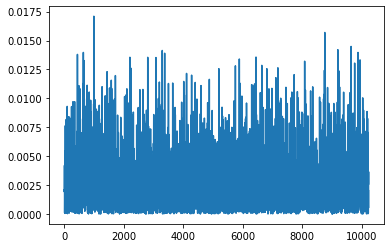

In [333]:
f = band_limited_noise(2,1000,10240,10240)
plt.plot(f)

In [334]:
decade(f)

[0.00216556 0.00402558 0.00196276 ... 0.00208421 0.00420034 0.0002927 ]
3.145241369088665
